TEMP at 2 M
K
<class 'numpy.ndarray'>
(1, 69, 97)


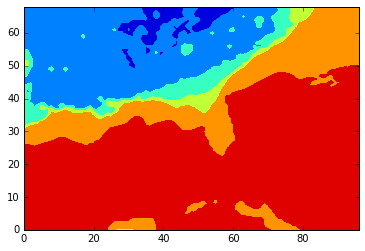

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-09_12:00:00'

dataset = netCDF4.Dataset(WRFOUT_FILE_PATH, 'r')

# Let's explore T2
T2_var = dataset.variables['T2']
print(T2_var.description)
print(T2_var.units)
#print(T2_var.dimenstions)

# Store values in a numpy array
T2 = T2_var[:]
print(type(T2))
print(T2.shape)

# Quick plot
plt.contourf(T2[0,:,:])
plt.show()
